# Assignment 2: recommender System

## Code from the lecture

In [27]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('../../DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('../../DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('../../DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

In [28]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

In [29]:
def cosine_dist(a,b):
    res = a.dot(b)
    norm= (np.linalg.norm(a)*np.linalg.norm(b))
    if norm>0: #norm ist null wenn keine Berwerung existiert -> Fallunterscheidung
        return res/norm
    else:
        return res

In [30]:
#again, implementation not efficient: better use lamda opperators 

def create_cosine_matrix(r):
    d = np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
    for i in range(0,np.shape(movies)[0]):
        for j in range(0,np.shape(movies)[0]):
            if i!=j:
                d[i,j]=cosine_dist(r[:,i],r[:,j])
    return d

D = create_cosine_matrix(R)

In [31]:
def getTopN(movie_id, d, N=5):
    return d[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, d):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title), d))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

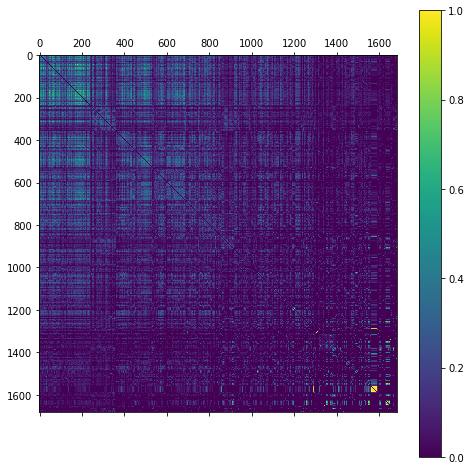

In [32]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D)
plt.colorbar()

In [33]:
CII("Star", D)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.


In [34]:
def euclidean_dist(a,b):        
    res = a.dot(b)
    norm= np.linalg.norm(a - b)
    if norm>0: #norm ist null wenn keine Berwerung existiert -> Fallunterscheidung
        return res/norm
    else:
        return res

In [35]:
def create_euclidean_matrix(r):
    d = np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
    
    for i in range(0,np.shape(movies)[0]):
        for j in range(0,np.shape(movies)[0]):
            if i!=j:
                d[i,j]=euclidean_dist(r[:,i],r[:,j])
    return d
D2 = create_euclidean_matrix(R)

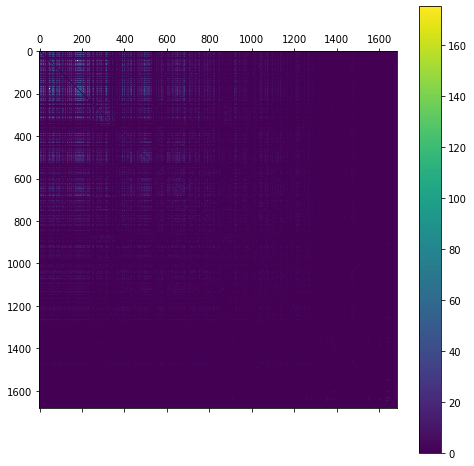

In [36]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D2)
plt.colorbar()

In [37]:
CII("Star", D2)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
99                        Fargo (1996)
Name: title, dtype: object

In [38]:
from sklearn.model_selection import train_test_split
R_train, R_test=train_test_split(R, test_size=0.1)
D_train = create_cosine_matrix(R_train)
D2_train = create_euclidean_matrix(R_train)

In [39]:
test_res=test_Score(D_train,R_test)
test_res2=test_Score(D2_train,R_test)


In [40]:
np.mean(test_res)

2.1136842105263156

(array([ 5.,  6., 16., 18., 12., 18.,  8.,  4.,  7.,  1.]),
 array([0.2  , 0.636, 1.072, 1.508, 1.944, 2.38 , 2.816, 3.252, 3.688,
        4.124, 4.56 ]),
 <BarContainer object of 10 artists>)

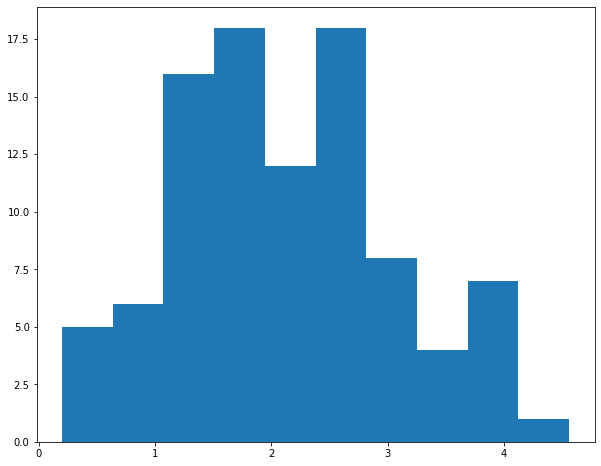

In [41]:
plt.hist(test_res)

In [42]:
np.mean(test_res2)

2.2955789473684214

(array([ 5.,  6., 13., 12., 15., 21.,  8.,  7.,  6.,  2.]),
 array([0.2  , 0.648, 1.096, 1.544, 1.992, 2.44 , 2.888, 3.336, 3.784,
        4.232, 4.68 ]),
 <BarContainer object of 10 artists>)

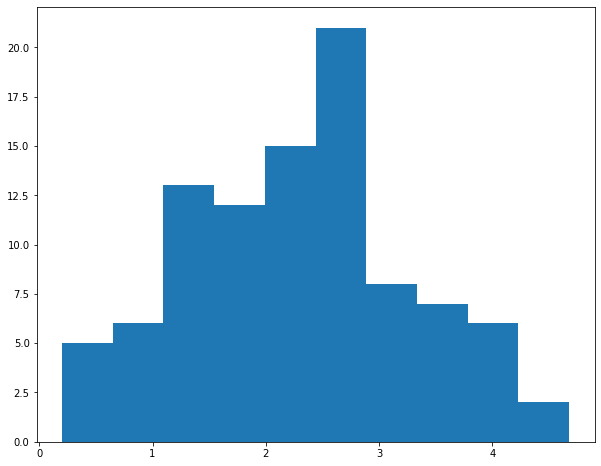

In [43]:
plt.hist(test_res2)

Das Verwenden der Euklidschen Distanz als Distanzmaß liefert ähnliche Ergebnisse wie die Cosinus Distanz.
Die Euklidsche Distanz ergibt leicht bessere durchschnittliche Bewertungen.
Das Histogramm zeigt eine Verteilung die leicht einer gausschen Normalform gleicht
(zumindest eher als das Histogramm der Bewertungen die aus der Cosinus Matrix resultieren).

## 4.2 Baseline Results
Implement and compare results of
* random recommendations
* allways recommending the top 5 movies (over all users)

In [44]:
avg_ratings = np.average(R, axis=0)

In [45]:
top_movies_index = np.argsort(avg_ratings)[-5:]
top_movies_rating = avg_ratings[top_movies_index]
np.mean(top_movies_rating)

2.2069989395546132

In [46]:
rnd_movies = np.random.choice(avg_ratings, size=5)
np.mean(rnd_movies)

0.11304347826086958

Die top 5 movies recommendations geben ergeben immer die gleiche hohe durchschnittliche Bewertung. Da immer die
gleichen Filme vorgeschlagen werden gibt es jedoch keine Diversität. Die random recommendations resultieren in einer
hohen Diversität jedoch in einer sehr geringen durchschnittlichen Bewertung.

## 4.3 SVD
Implement the SVD approach. Hints: 
* use numpy.linalg.svd()
* apply SVD on $D$
* plot the singular values and decide where to cut off the reconstruction
* reconstruct and evaluate $D'$

In [47]:
U,S,V=np.linalg.svd(D)


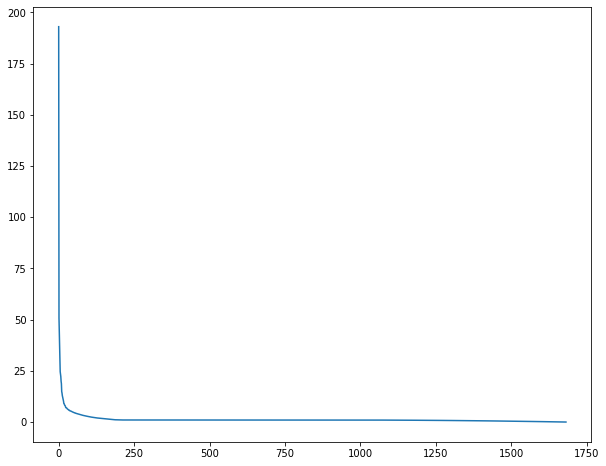

In [48]:
plt.figure()
ax = plt.subplot(111)
ax.plot(S)

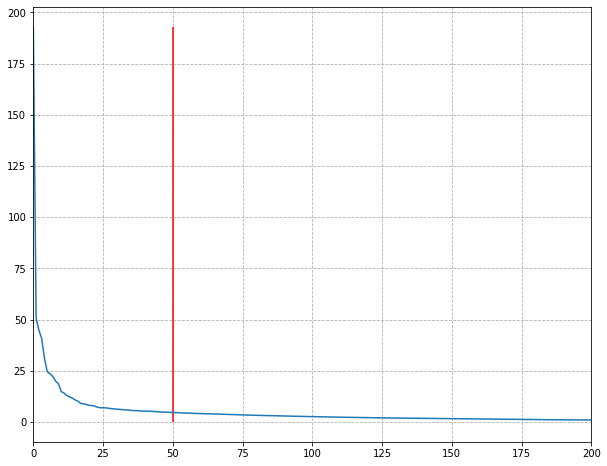

In [49]:
plt.figure()
ax = plt.subplot(111)
ax.grid(linestyle='dashed')
ax.set_xlim([0, 200])
ax.vlines(x = 50, ymin = 0, ymax = max(S), colors = 'red')
ax.plot(S)

In [50]:
D_r = np.dot(U[:,:50]*S[:50],V[:50,:])

In [51]:
U,S,V=np.linalg.svd(D_train)
D_svd = np.dot(U[:,:50]*S[:50],V[:50,:])
test_res_svd=test_Score(D_svd,R_test)
np.mean(test_res_svd)

2.7772631578947364

In [52]:
test_res_org=test_Score(D_train,R_test)
np.mean(test_res_org)

2.1136842105263156

Für die Rekonstruktion wurden 50 Singularwerte verwendet. Es fällt auf, dass die durchschnittliche Bewertung mit der
Rekonstruierten SVD Matrix erheblich höher sind als die der orginalen Matrix.